In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
google_colab = input('Running on Colab?\n')
if google_colab == 'yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
from cnp.cnp import RegressionCNP

import torch
import numpy as np

# import utils
import json
from datetime import date

Running on Colab?
no
Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [3]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = 'configs'
else:
    config_dir = os.path.join(BASE_DIR,'configs')



## Simple aggregation using the mean

In [4]:
with open(os.path.join(config_dir,'1d_polynomial_compare_learnable_aggregation.json')) as f:
    file = f.read()
    default_conf = json.loads(file)

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


In [5]:
default_conf

{'cnp_params': {'dimout': 2,
  'dimr': 128,
  'dimx': 1,
  'dimy': 1,
  'dropout': 0,
  'max_contx': 10,
  'max_funcs': 10,
  'min_contx': 3,
  'min_funcs': 2,
  'fix_num_contxt': False,
  'num_layers_decoder': 3,
  'num_layers_encoder': 4,
  'num_neurons_decoder': 128,
  'num_neurons_encoder': 128,
  'aggregation_kwargs': {'aggregator': 'BasicMLPAggregator',
   'insize': 128,
   'num_layers': 2,
   'num_neurons': 64,
   'dimout': 1}},
 'data_kwargs': {'datagenerator': 'cnp.datageneration.PolynomialRegression',
  'mu': 0,
  'sigma': 2,
  'num_instances_train': 64,
  'num_instances_vali': 1,
  'num_instances_test': 1},
 'experiment_params': {'dim_observation': 50,
  'lr': 0.001,
  'n_epochs': 10000,
  'range_x': [-2, 2],
  'seed': None,
  'dimx': 1,
  'train_on_gpu': False},
 'train_kwargs': {'batch_size_train': 64,
  'batch_size_vali': 1,
  'batch_size_test': 1,
  'plotting': True,
  'print_after': 100}}

In [6]:
CondNeuralProcess = RegressionCNP(**default_conf['cnp_params'])

Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)


In [7]:
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['data_kwargs'],
    **default_conf['experiment_params'])
                         

  0%|          | 0/10000 [00:00<?, ?it/s]

Mean training loss at epoch 0 :                         88.212
Mean Validation loss after 0 equals                     34.409

Validation loss for the function plotted:                 34.409


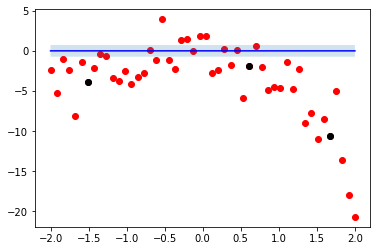

  1%|          | 97/10000 [00:01<02:41, 61.50it/s]

Mean training loss at epoch 100 :                         3.006
Mean Validation loss after 100 equals                     8.902

Validation loss for the function plotted:                 8.902


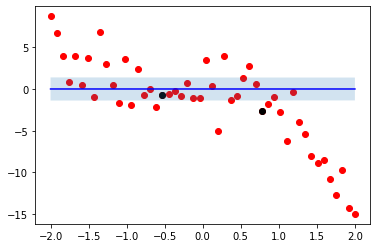

  2%|▏         | 200/10000 [00:03<02:32, 64.10it/s]

Mean training loss at epoch 200 :                         3.286
Mean Validation loss after 200 equals                     2.814

Validation loss for the function plotted:                 2.814


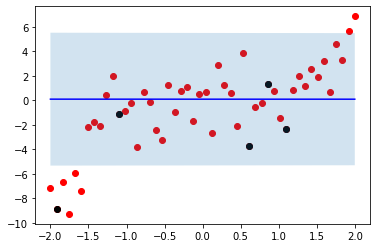

  3%|▎         | 299/10000 [00:05<02:31, 64.14it/s]

Mean training loss at epoch 300 :                         2.997
Mean Validation loss after 300 equals                     2.849

Validation loss for the function plotted:                 2.849


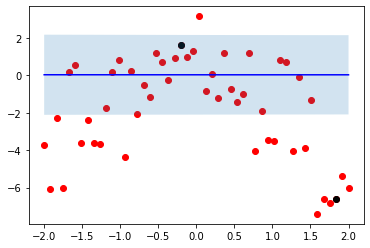

  4%|▍         | 396/10000 [00:06<02:12, 72.42it/s]

Mean training loss at epoch 400 :                         3.582
Mean Validation loss after 400 equals                     11.391

Validation loss for the function plotted:                 11.391


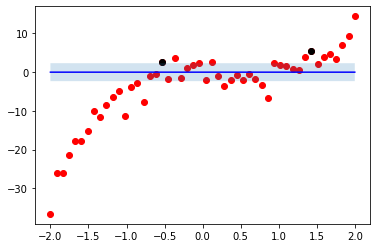

  5%|▍         | 495/10000 [00:08<02:20, 67.48it/s]

Mean training loss at epoch 500 :                         3.345
Mean Validation loss after 500 equals                     3.123

Validation loss for the function plotted:                 3.123


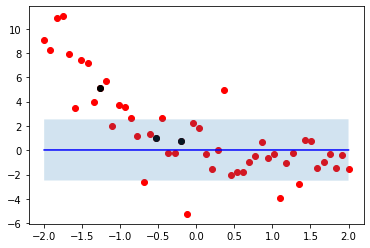

  6%|▌         | 599/10000 [00:10<02:33, 61.42it/s]

Mean training loss at epoch 600 :                         3.467
Mean Validation loss after 600 equals                     3.054

Validation loss for the function plotted:                 3.054


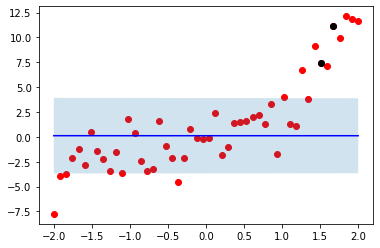

  7%|▋         | 698/10000 [00:12<02:09, 71.87it/s]

Mean training loss at epoch 700 :                         2.897
Mean Validation loss after 700 equals                     2.985

Validation loss for the function plotted:                 2.985


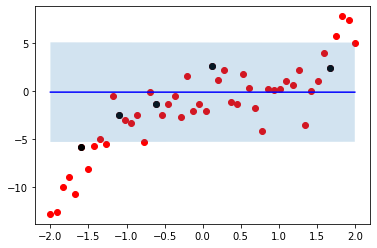

  8%|▊         | 798/10000 [00:13<02:15, 67.94it/s]

Mean training loss at epoch 800 :                         3.17
Mean Validation loss after 800 equals                     8.47

Validation loss for the function plotted:                 8.47


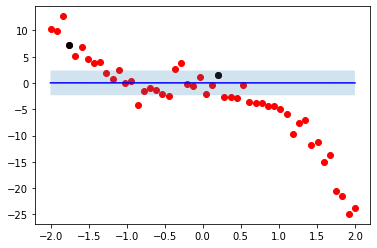

  9%|▉         | 899/10000 [00:15<02:20, 64.88it/s]

Mean training loss at epoch 900 :                         2.926
Mean Validation loss after 900 equals                     3.347

Validation loss for the function plotted:                 3.347


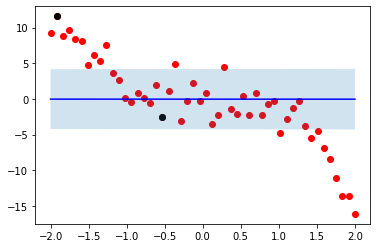

 10%|▉         | 995/10000 [00:16<02:21, 63.54it/s]

Mean training loss at epoch 1000 :                         3.247
Mean Validation loss after 1000 equals                     2.336

Validation loss for the function plotted:                 2.336


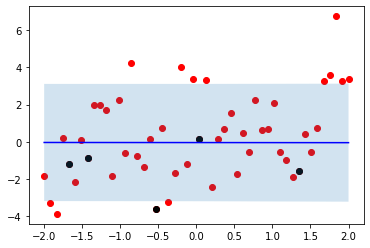

 11%|█         | 1097/10000 [00:18<02:04, 71.63it/s]

Mean training loss at epoch 1100 :                         3.028
Mean Validation loss after 1100 equals                     4.459

Validation loss for the function plotted:                 4.459


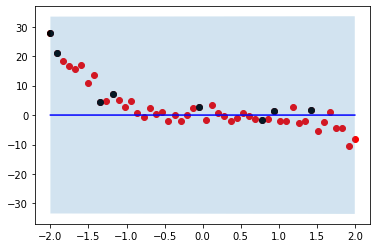

 12%|█▏        | 1197/10000 [00:20<02:21, 62.18it/s]

Mean training loss at epoch 1200 :                         3.485
Mean Validation loss after 1200 equals                     5.433

Validation loss for the function plotted:                 5.433


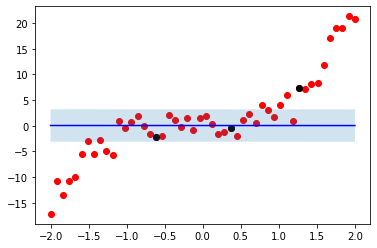

 13%|█▎        | 1293/10000 [00:21<02:43, 53.34it/s]

Mean training loss at epoch 1300 :                         3.52
Mean Validation loss after 1300 equals                     4.117

Validation loss for the function plotted:                 4.117


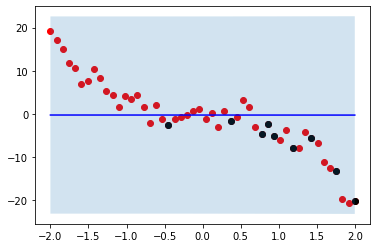

 14%|█▍        | 1396/10000 [00:23<02:23, 59.98it/s]

Mean training loss at epoch 1400 :                         2.013
Mean Validation loss after 1400 equals                     3.186

Validation loss for the function plotted:                 3.186


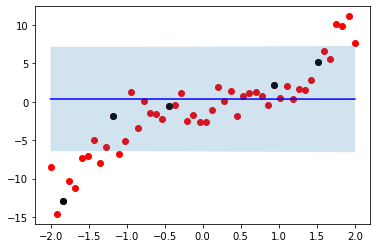

 15%|█▍        | 1496/10000 [00:25<02:04, 68.11it/s]

Mean training loss at epoch 1500 :                         2.412
Mean Validation loss after 1500 equals                     3.676

Validation loss for the function plotted:                 3.676


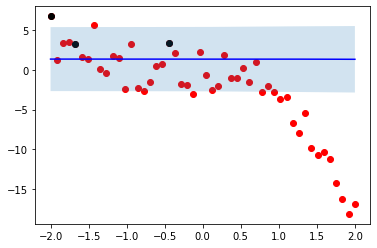

 16%|█▌        | 1600/10000 [00:27<02:07, 66.01it/s]

Mean training loss at epoch 1600 :                         2.918
Mean Validation loss after 1600 equals                     3.048

Validation loss for the function plotted:                 3.048


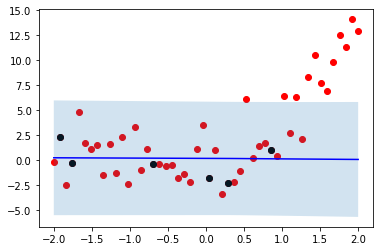

 17%|█▋        | 1697/10000 [00:29<02:13, 62.36it/s]

Mean training loss at epoch 1700 :                         4.661
Mean Validation loss after 1700 equals                     2.229

Validation loss for the function plotted:                 2.229


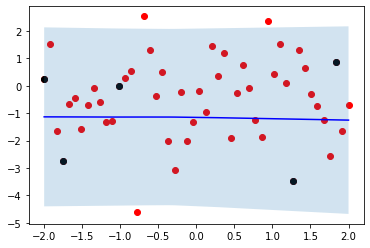

 18%|█▊        | 1793/10000 [00:30<02:07, 64.24it/s]

Mean training loss at epoch 1800 :                         3.099
Mean Validation loss after 1800 equals                     5.296

Validation loss for the function plotted:                 5.296


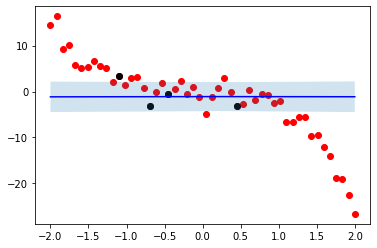

 19%|█▉        | 1895/10000 [00:32<02:07, 63.75it/s]

Mean training loss at epoch 1900 :                         3.062
Mean Validation loss after 1900 equals                     2.64

Validation loss for the function plotted:                 2.64


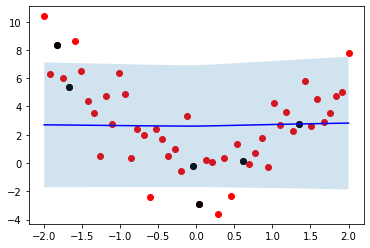

 20%|█▉        | 1993/10000 [00:34<01:52, 71.02it/s]

Mean training loss at epoch 2000 :                         2.626
Mean Validation loss after 2000 equals                     3.833

Validation loss for the function plotted:                 3.833


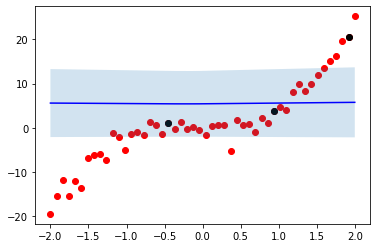

 21%|██        | 2099/10000 [00:35<01:49, 72.15it/s]

Mean training loss at epoch 2100 :                         2.415
Mean Validation loss after 2100 equals                     3.16

Validation loss for the function plotted:                 3.16


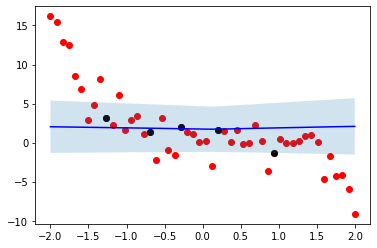

 22%|██▏       | 2199/10000 [00:37<01:46, 73.31it/s]

Mean training loss at epoch 2200 :                         2.924
Mean Validation loss after 2200 equals                     4.014

Validation loss for the function plotted:                 4.014


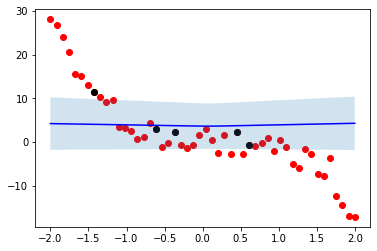

 23%|██▎       | 2296/10000 [00:39<02:01, 63.40it/s]

Mean training loss at epoch 2300 :                         3.039
Mean Validation loss after 2300 equals                     2.815

Validation loss for the function plotted:                 2.815


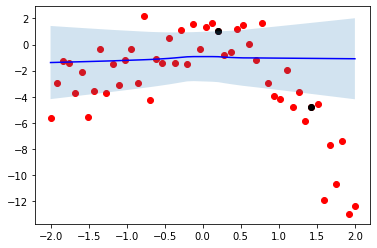

 24%|██▍       | 2396/10000 [00:40<02:14, 56.67it/s]

Mean training loss at epoch 2400 :                         2.65
Mean Validation loss after 2400 equals                     3.548

Validation loss for the function plotted:                 3.548


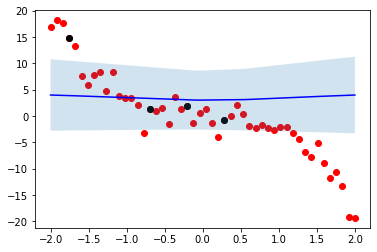

 25%|██▌       | 2500/10000 [00:42<01:46, 70.75it/s]

Mean training loss at epoch 2500 :                         2.812
Mean Validation loss after 2500 equals                     2.653

Validation loss for the function plotted:                 2.653


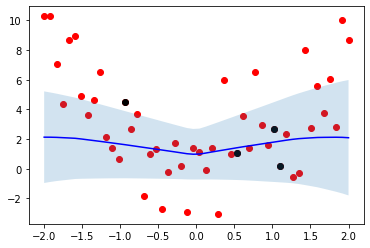

 26%|██▌       | 2595/10000 [00:44<01:45, 70.47it/s]

Mean training loss at epoch 2600 :                         3.368
Mean Validation loss after 2600 equals                     2.568

Validation loss for the function plotted:                 2.568


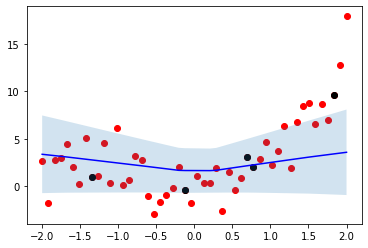

 27%|██▋       | 2695/10000 [00:45<01:41, 72.17it/s]

Mean training loss at epoch 2700 :                         2.724
Mean Validation loss after 2700 equals                     2.657

Validation loss for the function plotted:                 2.657


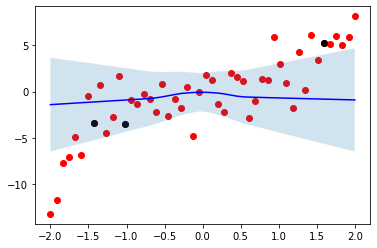

 28%|██▊       | 2795/10000 [00:47<01:48, 66.57it/s]

Mean training loss at epoch 2800 :                         2.673
Mean Validation loss after 2800 equals                     3.265

Validation loss for the function plotted:                 3.265


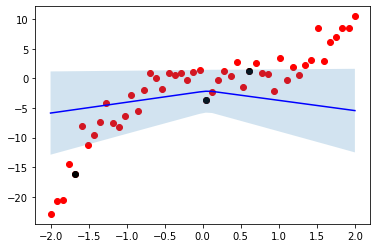

 29%|██▉       | 2893/10000 [00:48<01:41, 70.08it/s]

Mean training loss at epoch 2900 :                         2.361
Mean Validation loss after 2900 equals                     3.536

Validation loss for the function plotted:                 3.536


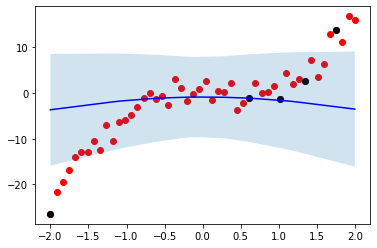

 30%|██▉       | 2998/10000 [00:50<02:06, 55.35it/s]

Mean training loss at epoch 3000 :                         2.011
Mean Validation loss after 3000 equals                     3.271

Validation loss for the function plotted:                 3.271


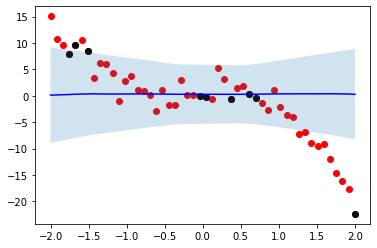

 31%|███       | 3095/10000 [00:52<01:47, 64.42it/s]

Mean training loss at epoch 3100 :                         3.154
Mean Validation loss after 3100 equals                     3.051

Validation loss for the function plotted:                 3.051


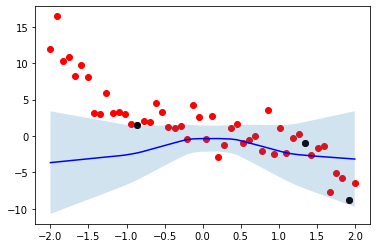

 32%|███▏      | 3200/10000 [00:54<01:41, 66.99it/s]

Mean training loss at epoch 3200 :                         2.798
Mean Validation loss after 3200 equals                     3.527

Validation loss for the function plotted:                 3.527


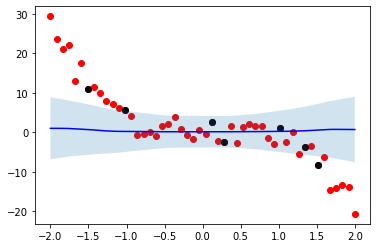

 33%|███▎      | 3300/10000 [00:56<02:01, 55.10it/s]

Mean training loss at epoch 3300 :                         2.485
Mean Validation loss after 3300 equals                     3.764

Validation loss for the function plotted:                 3.764


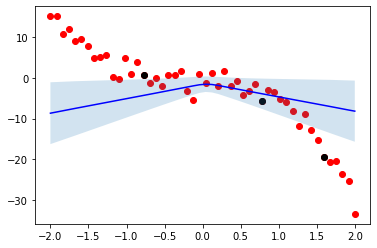

 34%|███▍      | 3397/10000 [00:58<01:58, 55.71it/s]

Mean training loss at epoch 3400 :                         2.945
Mean Validation loss after 3400 equals                     3.033

Validation loss for the function plotted:                 3.033


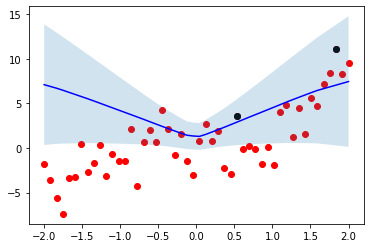

 35%|███▍      | 3494/10000 [01:00<01:40, 64.51it/s]

Mean training loss at epoch 3500 :                         2.764
Mean Validation loss after 3500 equals                     6.172

Validation loss for the function plotted:                 6.172


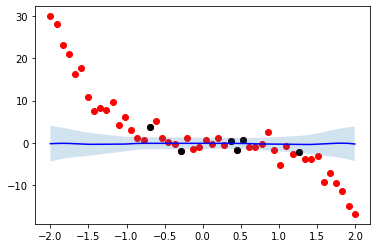

 36%|███▌      | 3597/10000 [01:02<01:40, 63.52it/s]

Mean training loss at epoch 3600 :                         2.531
Mean Validation loss after 3600 equals                     2.994

Validation loss for the function plotted:                 2.994


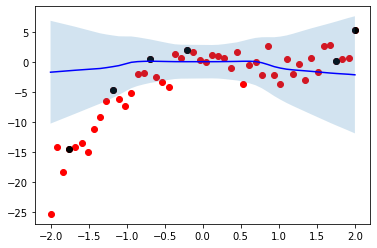

 37%|███▋      | 3694/10000 [01:03<01:37, 64.52it/s]

Mean training loss at epoch 3700 :                         2.421
Mean Validation loss after 3700 equals                     3.113

Validation loss for the function plotted:                 3.113


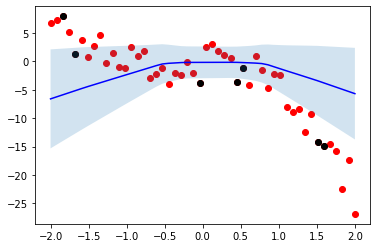

 38%|███▊      | 3798/10000 [01:05<01:55, 53.86it/s]

Mean training loss at epoch 3800 :                         2.875
Mean Validation loss after 3800 equals                     2.903

Validation loss for the function plotted:                 2.903


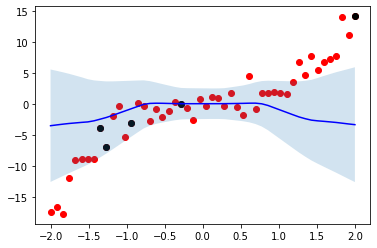

 39%|███▉      | 3900/10000 [01:07<01:44, 58.63it/s]

Mean training loss at epoch 3900 :                         2.782
Mean Validation loss after 3900 equals                     3.883

Validation loss for the function plotted:                 3.883


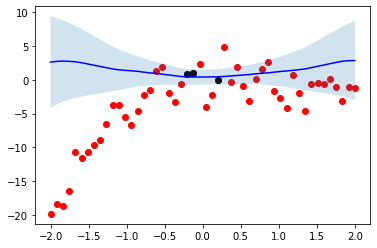

 40%|███▉      | 3995/10000 [01:09<01:36, 61.91it/s]

Mean training loss at epoch 4000 :                         2.347
Mean Validation loss after 4000 equals                     2.62

Validation loss for the function plotted:                 2.62


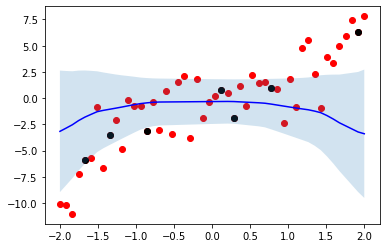

 41%|████      | 4094/10000 [01:11<01:33, 63.46it/s]

Mean training loss at epoch 4100 :                         1.837
Mean Validation loss after 4100 equals                     2.862

Validation loss for the function plotted:                 2.862


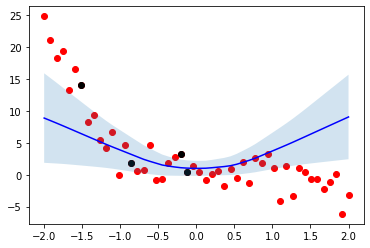

 42%|████▏     | 4196/10000 [01:13<01:23, 69.35it/s]

Mean training loss at epoch 4200 :                         2.588
Mean Validation loss after 4200 equals                     2.548

Validation loss for the function plotted:                 2.548


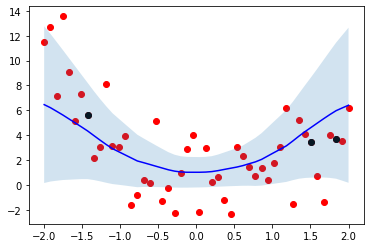

 43%|████▎     | 4298/10000 [01:15<01:30, 62.87it/s]

Mean training loss at epoch 4300 :                         3.034
Mean Validation loss after 4300 equals                     2.615

Validation loss for the function plotted:                 2.615


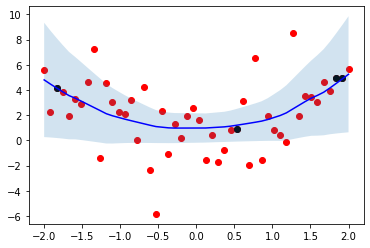

 44%|████▍     | 4399/10000 [01:17<01:20, 69.45it/s]

Mean training loss at epoch 4400 :                         2.623
Mean Validation loss after 4400 equals                     2.477

Validation loss for the function plotted:                 2.477


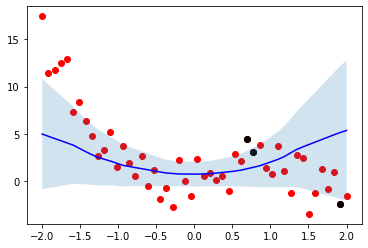

 45%|████▍     | 4496/10000 [01:19<01:26, 63.51it/s]

Mean training loss at epoch 4500 :                         2.57
Mean Validation loss after 4500 equals                     4.232

Validation loss for the function plotted:                 4.232


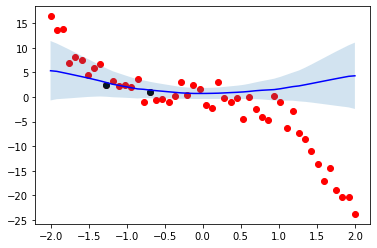

 46%|████▌     | 4599/10000 [01:20<01:39, 54.22it/s]

Mean training loss at epoch 4600 :                         2.495
Mean Validation loss after 4600 equals                     3.438

Validation loss for the function plotted:                 3.438


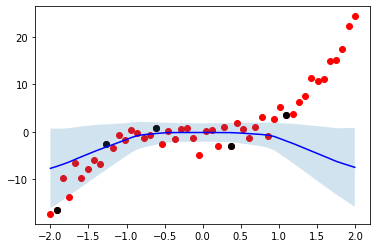

 47%|████▋     | 4694/10000 [01:22<01:26, 61.40it/s]

Mean training loss at epoch 4700 :                         3.127
Mean Validation loss after 4700 equals                     2.596

Validation loss for the function plotted:                 2.596


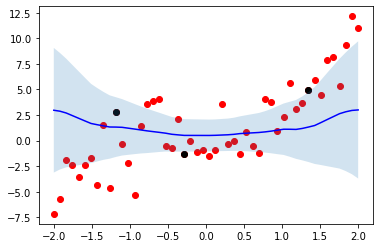

 48%|████▊     | 4795/10000 [01:24<01:15, 69.11it/s]

Mean training loss at epoch 4800 :                         2.639
Mean Validation loss after 4800 equals                     2.713

Validation loss for the function plotted:                 2.713


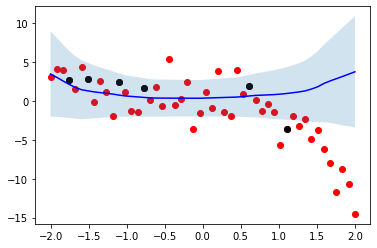

 49%|████▉     | 4900/10000 [01:26<01:22, 61.71it/s]

Mean training loss at epoch 4900 :                         2.677
Mean Validation loss after 4900 equals                     2.452

Validation loss for the function plotted:                 2.452


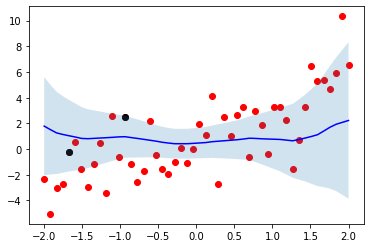

 50%|████▉     | 4999/10000 [01:28<01:28, 56.52it/s]

Mean training loss at epoch 5000 :                         2.773
Mean Validation loss after 5000 equals                     3.096

Validation loss for the function plotted:                 3.096


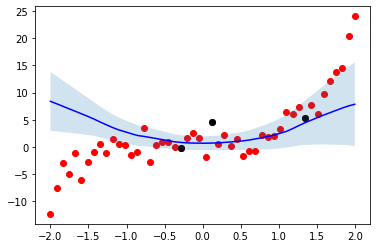

 51%|█████     | 5098/10000 [01:30<01:32, 53.13it/s]

Mean training loss at epoch 5100 :                         2.911
Mean Validation loss after 5100 equals                     2.244

Validation loss for the function plotted:                 2.244


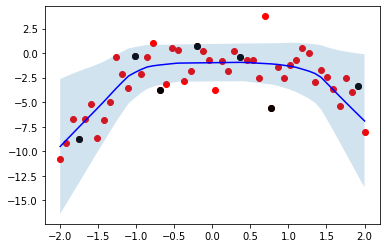

 52%|█████▏    | 5197/10000 [01:32<01:25, 56.35it/s]

Mean training loss at epoch 5200 :                         2.584
Mean Validation loss after 5200 equals                     2.962

Validation loss for the function plotted:                 2.962


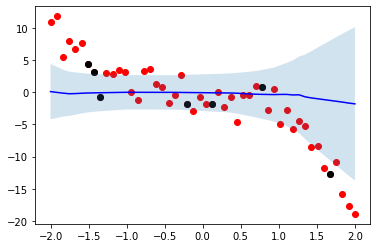

 53%|█████▎    | 5299/10000 [01:34<01:16, 61.11it/s]

Mean training loss at epoch 5300 :                         2.074
Mean Validation loss after 5300 equals                     2.757

Validation loss for the function plotted:                 2.757


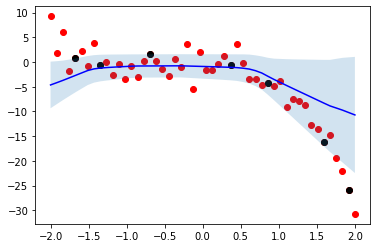

 54%|█████▍    | 5398/10000 [01:35<01:07, 68.22it/s]

Mean training loss at epoch 5400 :                         2.138
Mean Validation loss after 5400 equals                     3.756

Validation loss for the function plotted:                 3.756


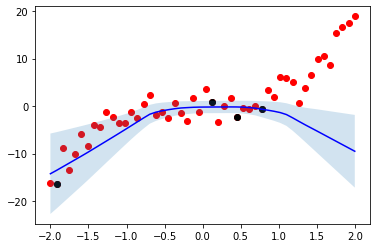

 55%|█████▍    | 5496/10000 [01:37<01:07, 66.30it/s]

Mean training loss at epoch 5500 :                         2.776
Mean Validation loss after 5500 equals                     2.611

Validation loss for the function plotted:                 2.611


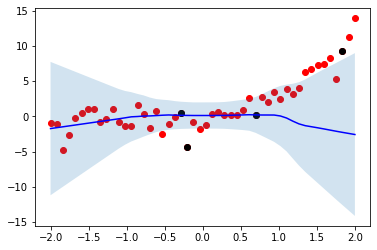

 56%|█████▌    | 5597/10000 [01:39<01:06, 66.36it/s]

Mean training loss at epoch 5600 :                         2.297
Mean Validation loss after 5600 equals                     2.387

Validation loss for the function plotted:                 2.387


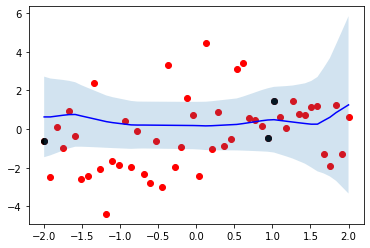

 57%|█████▋    | 5697/10000 [01:41<01:02, 68.47it/s]

Mean training loss at epoch 5700 :                         2.167
Mean Validation loss after 5700 equals                     2.798

Validation loss for the function plotted:                 2.798


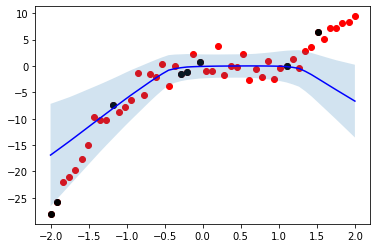

 58%|█████▊    | 5796/10000 [01:42<01:04, 65.32it/s]

Mean training loss at epoch 5800 :                         2.551
Mean Validation loss after 5800 equals                     2.986

Validation loss for the function plotted:                 2.986


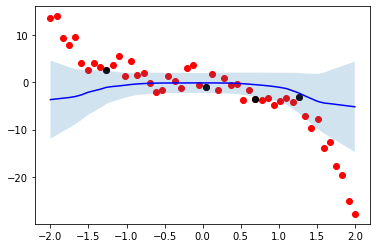

 59%|█████▉    | 5898/10000 [01:44<01:12, 56.47it/s]

Mean training loss at epoch 5900 :                         2.65
Mean Validation loss after 5900 equals                     3.021

Validation loss for the function plotted:                 3.021


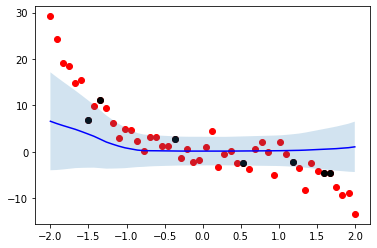

 60%|█████▉    | 5994/10000 [01:46<01:15, 52.72it/s]

Mean training loss at epoch 6000 :                         2.337
Mean Validation loss after 6000 equals                     3.237

Validation loss for the function plotted:                 3.237


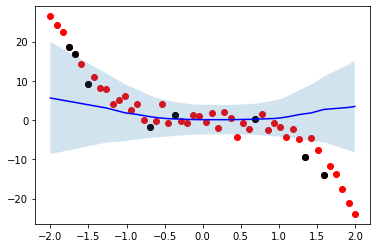

 61%|██████    | 6099/10000 [01:48<01:07, 57.52it/s]

Mean training loss at epoch 6100 :                         2.598
Mean Validation loss after 6100 equals                     2.415

Validation loss for the function plotted:                 2.415


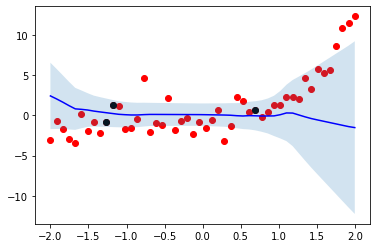

 62%|██████▏   | 6200/10000 [01:50<01:00, 63.20it/s]

Mean training loss at epoch 6200 :                         2.273
Mean Validation loss after 6200 equals                     3.302

Validation loss for the function plotted:                 3.302


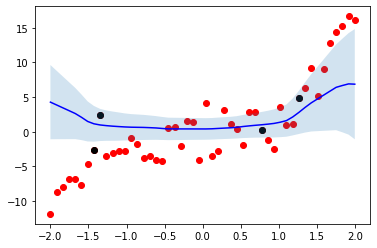

 63%|██████▎   | 6299/10000 [01:52<01:07, 54.52it/s]

Mean training loss at epoch 6300 :                         2.942
Mean Validation loss after 6300 equals                     2.351

Validation loss for the function plotted:                 2.351


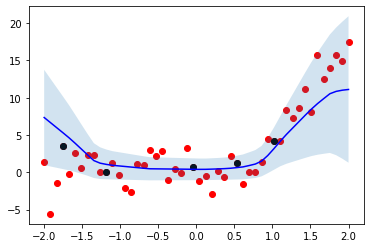

 64%|██████▍   | 6398/10000 [01:54<01:06, 54.28it/s]

Mean training loss at epoch 6400 :                         2.941
Mean Validation loss after 6400 equals                     2.374

Validation loss for the function plotted:                 2.374


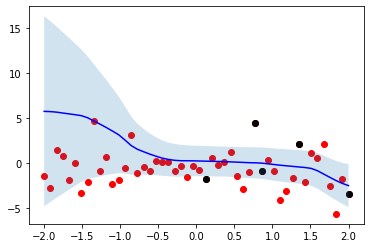

 65%|██████▍   | 6498/10000 [01:56<01:06, 52.51it/s]

Mean training loss at epoch 6500 :                         2.468
Mean Validation loss after 6500 equals                     2.183

Validation loss for the function plotted:                 2.183


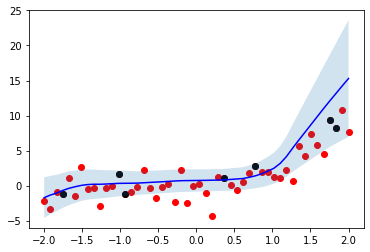

 66%|██████▌   | 6600/10000 [01:58<01:05, 51.79it/s]

Mean training loss at epoch 6600 :                         2.56
Mean Validation loss after 6600 equals                     2.542

Validation loss for the function plotted:                 2.542


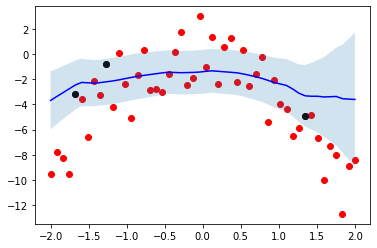

 67%|██████▋   | 6697/10000 [02:00<00:51, 63.66it/s]

Mean training loss at epoch 6700 :                         2.245
Mean Validation loss after 6700 equals                     2.85

Validation loss for the function plotted:                 2.85


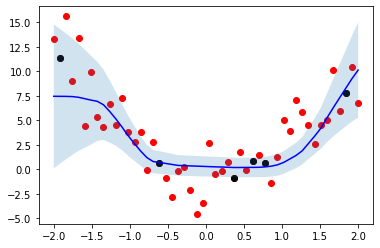

 68%|██████▊   | 6799/10000 [02:02<01:02, 50.88it/s]

Mean training loss at epoch 6800 :                         2.357
Mean Validation loss after 6800 equals                     2.536

Validation loss for the function plotted:                 2.536


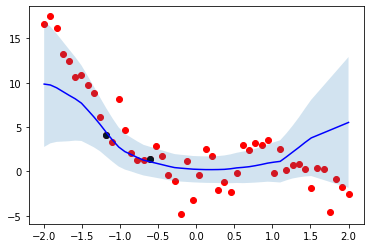

 69%|██████▉   | 6895/10000 [02:04<00:47, 65.78it/s]

Mean training loss at epoch 6900 :                         2.297
Mean Validation loss after 6900 equals                     3.477

Validation loss for the function plotted:                 3.477


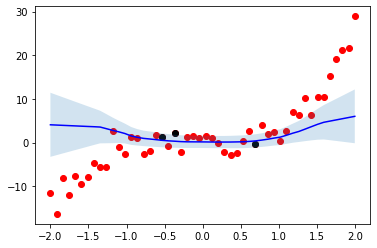

 70%|██████▉   | 6994/10000 [02:05<00:46, 64.71it/s]

Mean training loss at epoch 7000 :                         1.876
Mean Validation loss after 7000 equals                     3.953

Validation loss for the function plotted:                 3.953


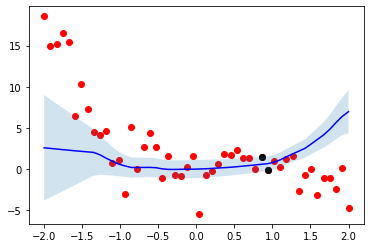

 71%|███████   | 7096/10000 [02:07<00:48, 60.36it/s]

Mean training loss at epoch 7100 :                         1.751
Mean Validation loss after 7100 equals                     2.462

Validation loss for the function plotted:                 2.462


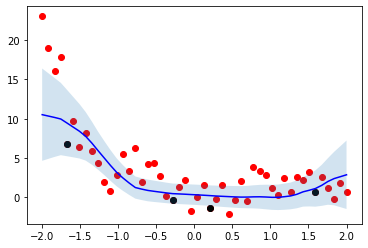

 72%|███████▏  | 7197/10000 [02:09<00:49, 56.71it/s]

Mean training loss at epoch 7200 :                         2.167
Mean Validation loss after 7200 equals                     2.552

Validation loss for the function plotted:                 2.552


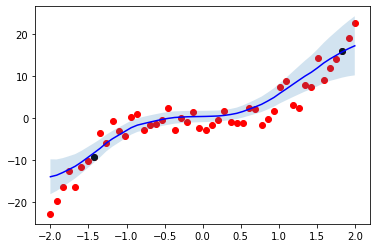

 73%|███████▎  | 7296/10000 [02:11<00:47, 56.51it/s]

Mean training loss at epoch 7300 :                         1.904
Mean Validation loss after 7300 equals                     2.736

Validation loss for the function plotted:                 2.736


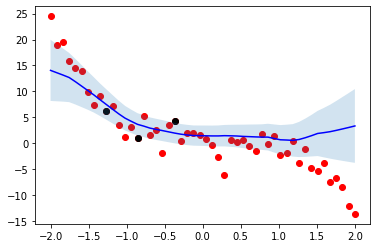

 74%|███████▍  | 7396/10000 [02:13<00:45, 57.77it/s]

Mean training loss at epoch 7400 :                         2.109
Mean Validation loss after 7400 equals                     2.462

Validation loss for the function plotted:                 2.462


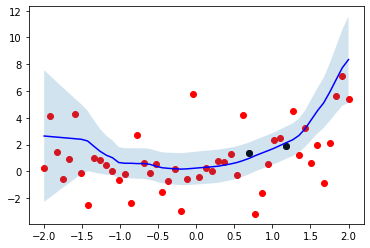

 75%|███████▌  | 7500/10000 [02:15<00:39, 63.40it/s]

Mean training loss at epoch 7500 :                         1.495
Mean Validation loss after 7500 equals                     3.172

Validation loss for the function plotted:                 3.172


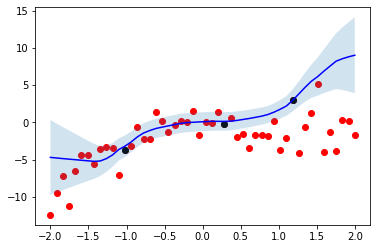

 76%|███████▌  | 7600/10000 [02:17<00:42, 56.40it/s]

Mean training loss at epoch 7600 :                         2.209
Mean Validation loss after 7600 equals                     2.755

Validation loss for the function plotted:                 2.755


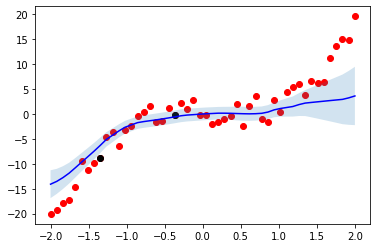

 77%|███████▋  | 7696/10000 [02:19<00:36, 63.26it/s]

Mean training loss at epoch 7700 :                         2.237
Mean Validation loss after 7700 equals                     2.798

Validation loss for the function plotted:                 2.798


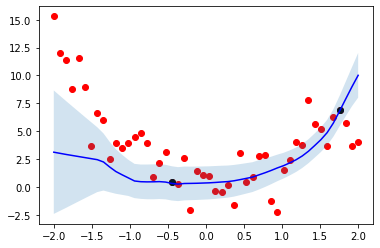

 78%|███████▊  | 7796/10000 [02:20<00:33, 66.44it/s]

Mean training loss at epoch 7800 :                         2.078
Mean Validation loss after 7800 equals                     3.62

Validation loss for the function plotted:                 3.62


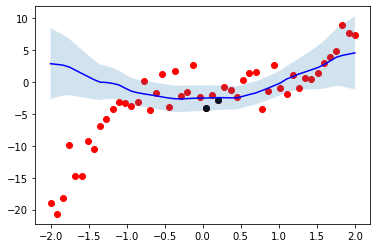

 79%|███████▉  | 7897/10000 [02:22<00:33, 62.67it/s]

Mean training loss at epoch 7900 :                         2.004
Mean Validation loss after 7900 equals                     2.379

Validation loss for the function plotted:                 2.379


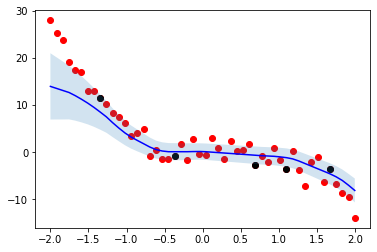

 80%|███████▉  | 7999/10000 [02:24<00:28, 69.99it/s]

Mean training loss at epoch 8000 :                         1.876
Mean Validation loss after 8000 equals                     2.613

Validation loss for the function plotted:                 2.613


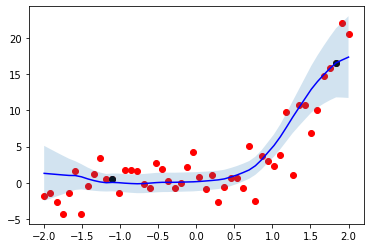

 81%|████████  | 8094/10000 [02:26<00:33, 56.27it/s]

Mean training loss at epoch 8100 :                         2.118
Mean Validation loss after 8100 equals                     3.22

Validation loss for the function plotted:                 3.22


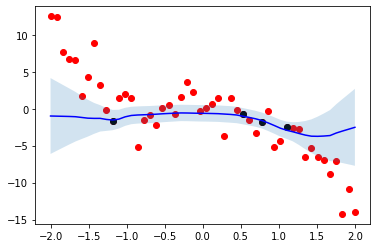

 82%|████████▏ | 8195/10000 [02:28<00:31, 57.72it/s]

Mean training loss at epoch 8200 :                         2.823
Mean Validation loss after 8200 equals                     2.283

Validation loss for the function plotted:                 2.283


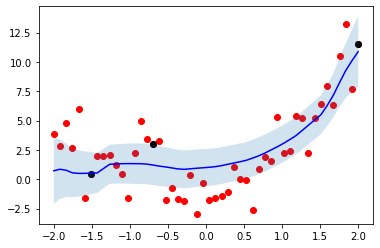

 83%|████████▎ | 8296/10000 [02:30<00:26, 64.41it/s]

Mean training loss at epoch 8300 :                         1.284
Mean Validation loss after 8300 equals                     2.454

Validation loss for the function plotted:                 2.454


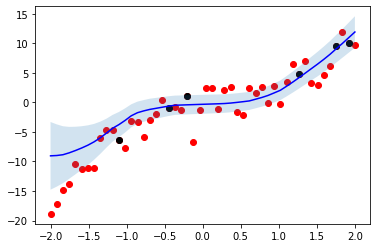

 84%|████████▍ | 8397/10000 [02:32<00:23, 67.80it/s]

Mean training loss at epoch 8400 :                         2.301
Mean Validation loss after 8400 equals                     2.186

Validation loss for the function plotted:                 2.186


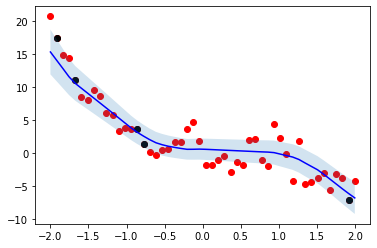

 85%|████████▍ | 8495/10000 [02:33<00:24, 60.88it/s]

Mean training loss at epoch 8500 :                         1.974
Mean Validation loss after 8500 equals                     3.507

Validation loss for the function plotted:                 3.507


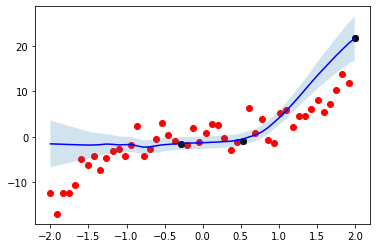

 86%|████████▌ | 8599/10000 [02:35<00:24, 56.47it/s]

Mean training loss at epoch 8600 :                         2.305
Mean Validation loss after 8600 equals                     3.171

Validation loss for the function plotted:                 3.171


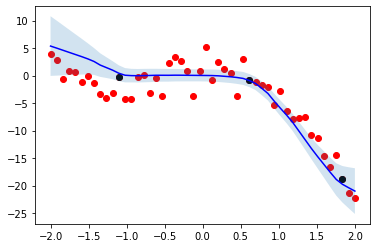

 87%|████████▋ | 8699/10000 [02:37<00:21, 59.22it/s]

Mean training loss at epoch 8700 :                         2.246
Mean Validation loss after 8700 equals                     2.558

Validation loss for the function plotted:                 2.558


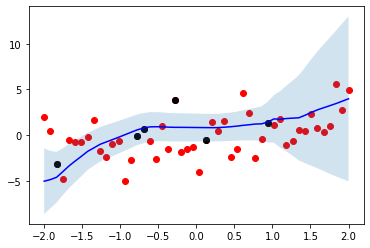

 88%|████████▊ | 8799/10000 [02:39<00:20, 57.49it/s]

Mean training loss at epoch 8800 :                         1.504
Mean Validation loss after 8800 equals                     3.276

Validation loss for the function plotted:                 3.276


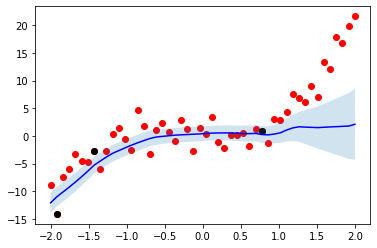

 89%|████████▉ | 8896/10000 [02:41<00:18, 61.30it/s]

Mean training loss at epoch 8900 :                         1.976
Mean Validation loss after 8900 equals                     2.223

Validation loss for the function plotted:                 2.223


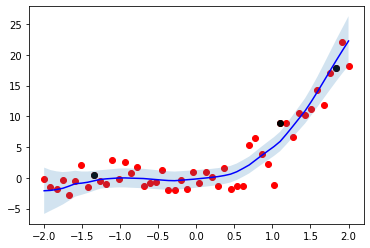

 90%|████████▉ | 8999/10000 [02:43<00:18, 55.43it/s]

Mean training loss at epoch 9000 :                         1.815
Mean Validation loss after 9000 equals                     2.538

Validation loss for the function plotted:                 2.538


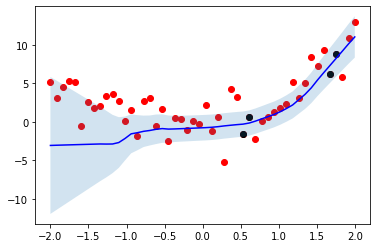

 91%|█████████ | 9096/10000 [02:45<00:15, 59.41it/s]

Mean training loss at epoch 9100 :                         1.462
Mean Validation loss after 9100 equals                     2.613

Validation loss for the function plotted:                 2.613


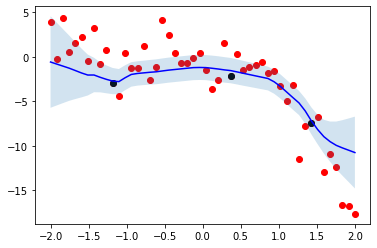

 92%|█████████▏| 9197/10000 [02:47<00:14, 56.87it/s]

Mean training loss at epoch 9200 :                         1.898
Mean Validation loss after 9200 equals                     2.453

Validation loss for the function plotted:                 2.453


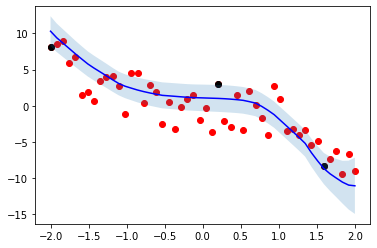

 93%|█████████▎| 9300/10000 [02:49<00:12, 57.83it/s]

Mean training loss at epoch 9300 :                         2.005
Mean Validation loss after 9300 equals                     2.422

Validation loss for the function plotted:                 2.422


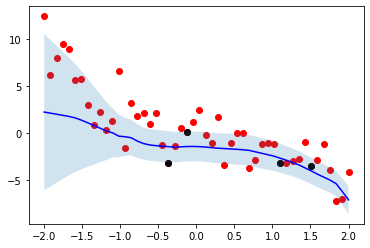

 94%|█████████▍| 9398/10000 [02:51<00:10, 58.85it/s]

Mean training loss at epoch 9400 :                         1.677
Mean Validation loss after 9400 equals                     2.688

Validation loss for the function plotted:                 2.688


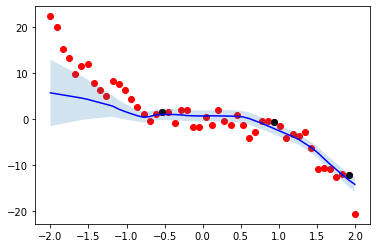

 95%|█████████▍| 9495/10000 [02:53<00:09, 51.17it/s]

Mean training loss at epoch 9500 :                         1.692
Mean Validation loss after 9500 equals                     2.584

Validation loss for the function plotted:                 2.584


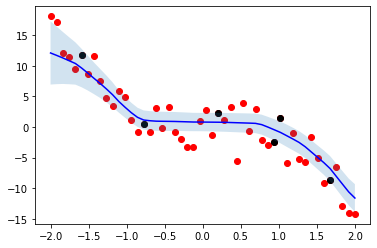

 96%|█████████▌| 9596/10000 [02:54<00:06, 61.95it/s]

Mean training loss at epoch 9600 :                         1.979
Mean Validation loss after 9600 equals                     3.026

Validation loss for the function plotted:                 3.026


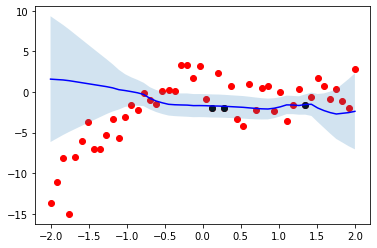

 97%|█████████▋| 9700/10000 [02:56<00:04, 61.92it/s]

Mean training loss at epoch 9700 :                         2.261
Mean Validation loss after 9700 equals                     2.38

Validation loss for the function plotted:                 2.38


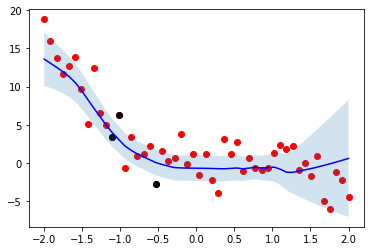

 98%|█████████▊| 9796/10000 [02:58<00:03, 54.91it/s]

Mean training loss at epoch 9800 :                         1.942
Mean Validation loss after 9800 equals                     4.2

Validation loss for the function plotted:                 4.2


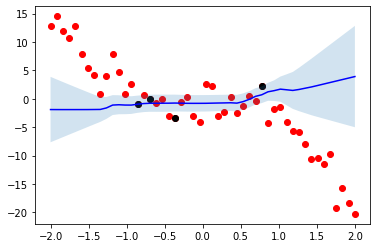

 99%|█████████▉| 9894/10000 [03:00<00:01, 60.07it/s]

Mean training loss at epoch 9900 :                         2.35
Mean Validation loss after 9900 equals                     2.082

Validation loss for the function plotted:                 2.082


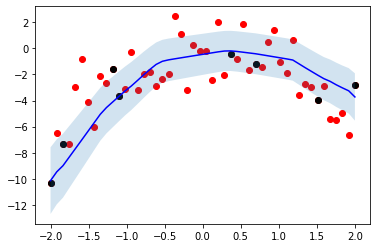

100%|██████████| 10000/10000 [03:02<00:00, 54.65it/s]


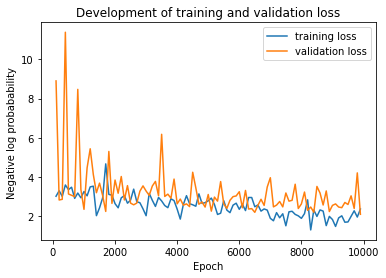

In [9]:
state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss = trainer.run_training(
    batch_size_train=default_conf['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['train_kwargs']['batch_size_vali'],
    print_after=default_conf['train_kwargs']['print_after'])

In [46]:
np.random.seed(0)
np.random.randint(5, 10)

9

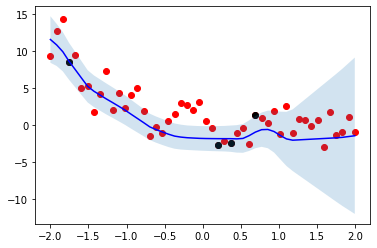

5.486286640167236


In [16]:
MSE = trainer.run_test(encoder_state_dict=state_dict_encoder,
              decoder_state_dict=state_dict_decoder,
              aggregator_state_dict=state_dict_aggregator,
              batch_size_test=default_conf['train_kwargs']['batch_size_test'])
print(MSE)

In [17]:
values = [state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss]
names = ['encoder', 'decoder', 'aggregator', 'train_loss', 'vali_loss', 'mse']
to_save = [(name, value) for name, value in zip(names, values)]
directory = os.path.join(BASE_DIR,'experiments/results')


Helper.save_results(directory, '1d_polynomial_paper_setting_lernable_weighted_average', to_save)